In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("data.csv")
pd.set_option("display.max_columns",100)
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [18]:
data["action_type"].value_counts()
data["combined_shot_type"].value_counts()
data["game_event_id"].value_counts()
data["game_id"].value_counts()
data["shot_type"].value_counts()
data["shot_zone_area"].value_counts()
data["shot_distance"].value_counts()

0     5542
25    1971
24    1507
17    1487
18    1430
16    1406
19    1360
26    1260
20    1202
15    1152
14    1061
13     934
21     805
12     787
7      710
10     702
11     701
22     675
8      675
6      650
1      636
9      614
2      581
23     574
5      529
27     517
3      377
4      369
28     190
29      82
      ... 
56       4
49       4
58       4
52       4
62       4
44       4
48       3
74       3
55       3
51       3
54       3
47       3
59       3
50       3
64       2
46       2
61       2
45       2
70       2
60       2
67       2
68       2
53       2
63       2
65       1
77       1
57       1
69       1
71       1
79       1
Name: shot_distance, Length: 74, dtype: int64

In [19]:
X = data[np.isnan(data["shot_made_flag"]) == False]
X_test = data[np.isnan(data["shot_made_flag"])]
y = X["shot_made_flag"]
X = X.drop("shot_made_flag", axis=1)

In [53]:
X["shot_distance"].sort_values().unique()
# X["shot_distance"].sort_values().value_counts()
X.groupby(['shot_distance']).agg(['count'])

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
shot_distance,,,,,,,,,,,,,,,,,,,,,,,
0,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608
1,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522
2,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483
3,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319
4,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317
5,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444
6,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557
7,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603


ValueError: incompatible sizes: argument 'height' must be length 74 or scalar

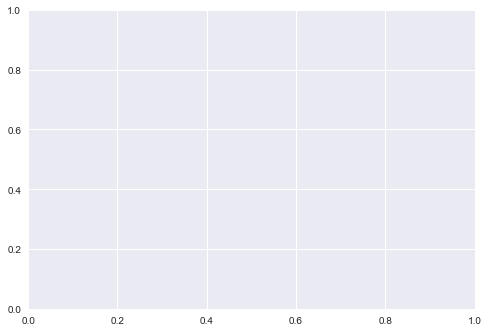

In [39]:
X["shot_distance"].value_counts()

plt.bar(X["shot_distance"].sort_values().unique(), X["shot_distance"].sort_values().nunique())

In [5]:
data[np.isnan(data["shot_made_flag"]) == False].corr()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
game_event_id,1.000000,-0.005982,-0.059602,-0.029954,0.059602,-0.029954,-0.274276,0.955914,-0.007963,-0.018670,0.063295,-0.037232,NaN,0.025433
game_id,-0.005982,1.000000,0.011361,-0.012944,-0.011361,-0.012944,0.009581,0.005061,0.917898,-0.009029,-0.027247,-0.001612,NaN,0.761232
lat,-0.059602,0.011361,1.000000,0.017578,-1.000000,0.017578,0.077399,-0.039737,-0.000857,0.057766,-0.818124,0.148070,NaN,-0.033476
loc_x,-0.029954,-0.012944,0.017578,1.000000,-0.017578,1.000000,0.006624,-0.030059,-0.007751,0.001512,0.022307,-0.000848,NaN,-0.012453
loc_y,0.059602,-0.011361,-1.000000,-0.017578,1.000000,-0.017578,-0.077399,0.039737,0.000857,-0.057766,0.818124,-0.148070,NaN,0.033476
lon,-0.029954,-0.012944,0.017578,1.000000,-0.017578,1.000000,0.006624,-0.030059,-0.007751,0.001512,0.022307,-0.000848,NaN,-0.012453
minutes_remaining,-0.274276,0.009581,0.077399,0.006624,-0.077399,0.006624,1.000000,-0.047021,0.009583,0.024232,-0.064159,0.028342,NaN,-0.008251
period,0.955914,0.005061,-0.039737,-0.030059,0.039737,-0.030059,-0.047021,1.000000,0.003905,0.007153,0.047311,-0.032152,NaN,-0.003357
playoffs,-0.007963,0.917898,-0.000857,-0.007751,0.000857,-0.007751,0.009583,0.003905,1.000000,-0.005951,-0.007751,-0.001257,NaN,0.612991
seconds_remaining,-0.018670,-0.009029,0.057766,0.001512,-0.057766,0.001512,0.024232,0.007153,-0.005951,1.000000,-0.055875,0.030804,NaN,-0.004833


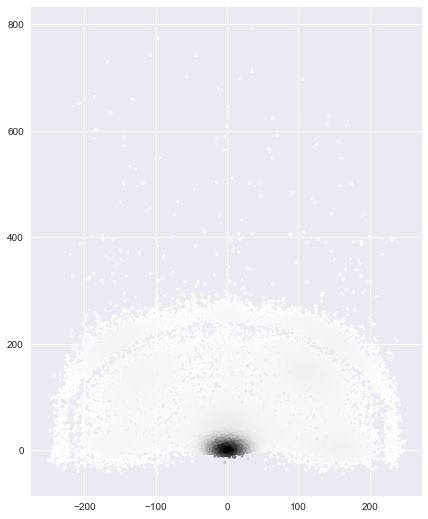

In [33]:
from scipy.stats import gaussian_kde
alpha = 0.02
plt.figure(figsize=(7,9))

loc_x = X["loc_x"]
loc_y = X["loc_y"]

# Calculate the point density
xy = np.vstack([loc_x,loc_y])
z = gaussian_kde(xy)(xy)

scat = plt.scatter(loc_x, loc_y, c = z, s = 10, edgecolor = '')